In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_white
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('CovidDataTime1.csv')

In [3]:
data = data.dropna()

In [4]:
data.describe()

,ProlificID,Age,Gender.1.Male,HouseholdIncome,Education,PoliticalOrientation,COVID19Consumption,AnxietyOwnHealth,AnxietyLovedOnes,AnxietyLockdown,...,AnxietyExercise,AnxietySupplies,AnxietySocializing,Anxiety_factor_noSTAI,Anxiety_factor_STAI,STAI_Score,STAI_scaled,Dependents,HealthCareInsuranceSatisfaction,Ethnicity
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,...,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000
mean,533.000000,44.778404,1.518310,4.743662,2.452582,1.312676,4.631925,60.400000,77.169014,48.563380,...,33.032864,56.963380,40.592488,54.599732,53.342710,46.726135,44.543558,1.704225,2.755869,4.391549
std,307.583322,15.498232,0.499899,2.275032,1.128849,0.463801,0.720089,26.644901,23.476784,29.916048,...,31.207766,28.928314,31.327417,18.057468,17.638078,15.261115,25.435192,0.456605,0.907636,1.346020
min,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,0.000000
25%,267.000000,31.000000,1.000000,3.000000,1.000000,1.000000,4.000000,45.000000,66.000000,23.000000,...,2.000000,34.000000,11.000000,43.285714,42.222222,33.333333,22.222222,1.000000,2.000000,5.000000
50%,533.000000,44.000000,2.000000,5.000000,3.000000,1.000000,5.000000,65.000000,82.000000,54.000000,...,24.000000,63.000000,38.000000,56.142857,54.861111,46.666667,44.444444,2.000000,3.000000,5.000000
75%,799.000000,59.000000,2.000000,7.000000,3.000000,2.000000,5.000000,79.000000,97.000000,72.000000,...,59.000000,78.000000,66.000000,66.714286,65.152778,60.000000,66.666667,2.000000,3.000000,5.000000
max,1065.000000,83.000000,2.000000,8.000000,4.000000,2.000000,6.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,97.714286,97.250000,80.000000,100.000000,2.000000,4.000000,5.000000


In [5]:
data = data[['Age', 'Gender.1.Male', 'HouseholdIncome', 'Education', 'PoliticalOrientation', 'COVID19Consumption', 'Anxiety_factor_noSTAI', 'Dependents', 'HealthCareInsuranceSatisfaction']]
data.head()

,Age,Gender.1.Male,HouseholdIncome,Education,PoliticalOrientation,COVID19Consumption,Anxiety_factor_noSTAI,Dependents,HealthCareInsuranceSatisfaction
0,43,2,6,3,2,4,62.142857,2,2
1,26,1,4,2,1,4,15.285714,2,2
2,24,2,3,3,1,5,79.857143,2,1
3,53,2,6,2,2,6,73.285714,1,1
4,36,2,2,1,1,5,63.857143,1,3


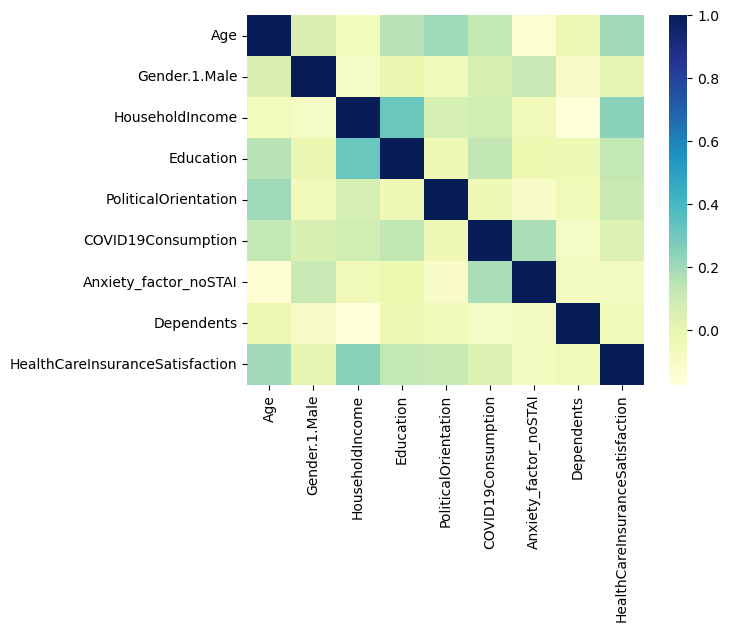

In [6]:
dataplot = sns.heatmap(data.corr(),cmap="YlGnBu")
plt.show()

In [7]:
X=data
Y=data["COVID19Consumption"]
X.drop("COVID19Consumption", axis=1, inplace=True)

In [8]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
7,10.950057,HealthCareInsuranceSatisfaction
6,10.222472,Dependents
0,10.172207,Age
1,9.030694,Gender.1.Male
4,8.654219,PoliticalOrientation
5,8.418733,Anxiety_factor_noSTAI
3,6.552280,Education
2,6.266096,HouseholdIncome


In [11]:
for key in data.keys():
    print(key,"length of unique values:",len(set(data[key].tolist())))

Age length of unique values: 62
Gender.1.Male length of unique values: 2
HouseholdIncome length of unique values: 8
Education length of unique values: 4
PoliticalOrientation length of unique values: 2
Anxiety_factor_noSTAI length of unique values: 440
Dependents length of unique values: 2
HealthCareInsuranceSatisfaction length of unique values: 4


In [12]:
for f in X.columns:
    X[f] = (X[f] - X[f].mean()) / X[f].std()

COVID-related information-seeking = β0 + β1* Anxiety Index Score + β2*Age + β3*Gender + β4*Educational level + β5*Income + β6*Political orientation + β7*Ethnicity + β8* Whether they had dependents + β9* satisfaction with their health insurance 

In [13]:
x = sm.add_constant(X)
multi_model1 = sm.OLS(Y, x).fit()
print(multi_model1.summary())

                            OLS Regression Results                            
Dep. Variable:     COVID19Consumption   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     11.46
Date:                Sat, 06 May 2023   Prob (F-statistic):           1.08e-15
Time:                        11:24:24   Log-Likelihood:                -1116.6
No. Observations:                1065   AIC:                             2251.
Df Residuals:                    1056   BIC:                             2296.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

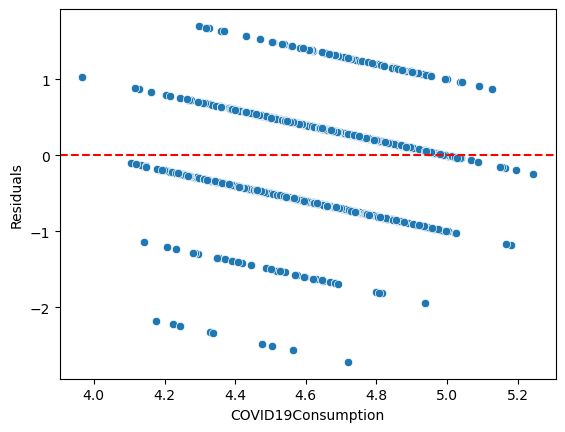

In [14]:
sns.scatterplot(x=multi_model1.fittedvalues, y=multi_model1.resid)

# Add a horizontal line at y=0
plt.axhline(y=0, color='r', linestyle='--')

# Add axis labels
plt.xlabel('COVID19Consumption')
plt.ylabel('Residuals')

# Show the plot
plt.show()

If the plot shows a random scatter of points with no discernible pattern, then the residuals are homoscedastic and have constant variance across the range of fitted values. This is a desirable property of a regression model, as it suggests that the model's assumptions are met and the results are reliable. 

In plots the residuals appear to be randomly scattered.

In [15]:
white_test = het_white(multi_model1.resid,  multi_model1.model.exog)
labels = ["Test Statistic", "Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, white_test)))

{'Test Statistic': 62.64877776423376, 'Test p-value': 0.01632660338992052, 'F-Statistic': 1.5594966828887131, 'F-Test p-value': 0.014567569289842732}


Heteroscedasticity refers to the unequal scatter of residuals at different levels of a response variable, which violates the assumption that the residuals are equally scattered at each level of the response variable.

Null (H0): Homoscedasticity is present (residuals are equally scattered)

Alternative (HA): Heteroscedasticity is not present (residuals are not equally scattered)

P-value is less than 0.5, which means residuals are equally scattered.

**Q-Q Plot**

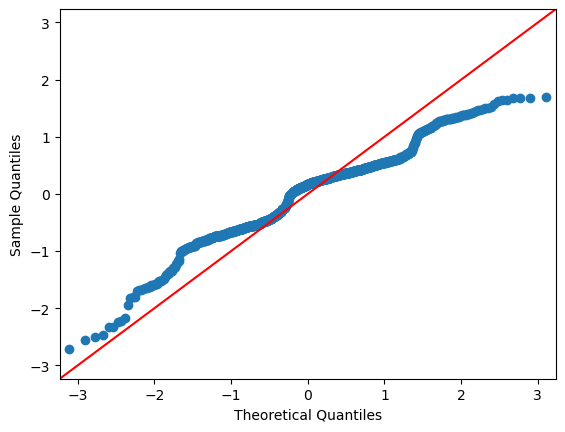

In [16]:
fig = sm.qqplot(multi_model1.resid, line='45')
plt.show()

In [15]:
print(multi_model1.summary())

                            OLS Regression Results                            
Dep. Variable:     COVID19Consumption   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     11.46
Date:                Sat, 29 Apr 2023   Prob (F-statistic):           1.08e-15
Time:                        19:23:06   Log-Likelihood:                -1116.6
No. Observations:                1065   AIC:                             2251.
Df Residuals:                    1056   BIC:                             2296.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     